# Zusatz: Erstellung veröffentlichungsreifer Diagramme

In diesem kurzen Text werde ich versuchen, einige Hinweise zu geben, wie man Plots in einer angemessenen Größe erzeugt, so dass Sie die Beispiele sofort in Ihrem Jupyter-Notebook oder eine Semesterarbeit verwenden können.

Sie möchten Ihre Abbildungen in einem Manuskript aus Plots zusammenstellen, die Sie als PDF-Dateien erzeugen, d.h. sie enthalten Vektorgrafiken. Das hat den Vorteil, dass Sie sie anschließend auf die passende Größe skalieren können, um sie in ein- oder zweispaltige Abbildungen zu quetschen. Das ist zwar verlockend, birgt aber die Gefahr, dass man jedes Diagramm unterschiedlich skaliert und dann alle Diagramme unterschiedliche Achsenbeschriftungsgrößen und Tickgrößen haben, was letztlich ein Durcheinander erzeugt.

Um das zu verhindern, könnte man die Diagramme in der entsprechenden Größe der einspaltigen oder zweispaltigen Verwendung mit den gleichen Achsen- und Ticklabelgrößen erstellen. Hier sind einige Hacks, mit denen Sie produktionsreife Plots direkt aus Ihren Jupyter-Notizbüchern erstellen und speichern können.

## Creating a plot with a specific bounding box size


If you create a plot in matplotlib you can specify a size with the parameter *figsize*, e.g.

```
plt.figure(figsize=(3,2))
```

for a figure of a width of 3 *inches* or 7.62 *cm* and a height of 2 *inches* (5.08 *cm*). If you do not use this parameter or if you even do not use the ```plt.figure()``` command, matplotlib will use the default size, which is often 8 *inches* times 6 *inches*. The default size is way to big as the figure would be then just a whole A4 page wide. A proper size of a plot for a single column in a two column paper would be the above 3 *inches* times 2 *inches* as a the whole paper width is 21 *cm* minus a marging of about 3 *cm* on each side gives a column width of about (21-6)/2=7.5 *cm*.

The Plot shown in Figure @fig-1 is created with the following commands

```
plt.figure(figsize=(3,2), dpi=150)
x=np.linspace(0,np.pi*4,200)
plt.plot(x,np.sin(x),color='k')
plt.xlabel(r"angle $\theta$ in [rad]")
plt.ylabel(r"$\sin(\theta)$")
plt.savefig("figure_example.pdf",
    bbox_inches = 'tight')
plt.show()
```

Die daraus resultierende PDF-Datei enthält eine Grafik mit einem Begrenzungsrahmen, der genau 3 *Zoll* mal 2 *Zoll* groß ist. Wenn Sie das Diagramm in ein beliebiges Zeichenprogramm wie Adobe Illustrator, Affinity Designer oder sogar in eine Textverarbeitungssoftware wie Word oder Pages einfügen, hat der Begrenzungsrahmen dieses Diagramms genau diese Größe, und Sie können weitere Diagramme anordnen, um eine ganze Abbildung zu erstellen, ohne die Skalierung ändern zu müssen. 
Wenn Sie das Diagramm in einem zweispaltigen LaTeX-Manuskript verwenden, kann es ohne Skalierung verwendet werden, d.h. durch ```includegraphics{Figure 1.pdf}``` wird es in der entsprechenden Größe über eine Spalte angezeigt.

Es gibt noch ein paar weitere Dinge zu beachten. 

- Während der Begrenzungsrahmen dieser Abbildung diese Größe hat, ist der Achsenrahmen kleiner, und oft bleibt auf der linken/unteren Seite ein gewisser Leerraum zwischen den Achsenbeschriftungen und dem Rand des Begrenzungsrahmens. Das hängt sehr stark von Ihrem spezifischen Diagramm ab. Wie Sie eine Abbildung mit einer festen Achsenrahmengröße erstellen, wird im zweiten Abschnitt behandelt.

- Die Schriftgröße auf der Achse beträgt jetzt 10 oder 11 *Punkte*, was der Schriftgröße der meisten Dokumente entspricht, die Sie mit dieser Abbildung erstellen.  Ich habe die folgenden plt.rcParams verwendet: 'axes.labelsize': 11, 'xtick.labelsize' : 10, 'ytick.labelsize' : 10 für die gezeigte Darstellung.

- Sie werden auch feststellen, dass die Arbeit mit dieser Abbildungsgröße in einem Jupyter-Notebook nicht gut ist. Das hat damit zu tun, wie Jupyter die Ausgabe in eine PNG-Datei übersetzt, die inline angezeigt wird. Eine Möglichkeit, den Plot im Jupyter-Notebook zu vergrößern, aber die PDF-Größe beizubehalten, besteht darin, den Parameter **dpi** im Befehl ```plt.figure(figsize=(3,2), dpi=150)``` zu erhöhen. Normalerweise ist er auf dpi=75 eingestellt, was jetzt viel zu klein ist. Eine Einstellung von dpi=150 scheint ein vernünftiger Kompromiss zwischen Bildschirm- und Druckgröße zu sein. Wenn Sie völlig unabhängig sein wollen 

- Der Befehl ```plt.savefig``` verwendet einen zusätzlichen ```bbox_inches = 'tight'``` Parameter, der sicherstellt, dass die Boundingbox auch wirklich alle Komponenten des Plots genau umschließt.

In [2]:
import matplotlib as mpl
import matplotlib.font_manager as font_manager
from IPython.core.display import HTML
import matplotlib.pyplot as plt
import numpy as np
from directory_tree import display_tree

In [3]:
plt.rcParams.update({'font.size': 12,
                     'lines.linewidth': 1,
                     'lines.markersize': 10,
                     'axes.labelsize': 11,
                     'xtick.labelsize' : 10,
                     'ytick.labelsize' : 10,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',}) 

%config InlineBackend.figure_format = 'retina'

In [4]:
def get_size(w,h):
    return((w/2.54,h/2.54))

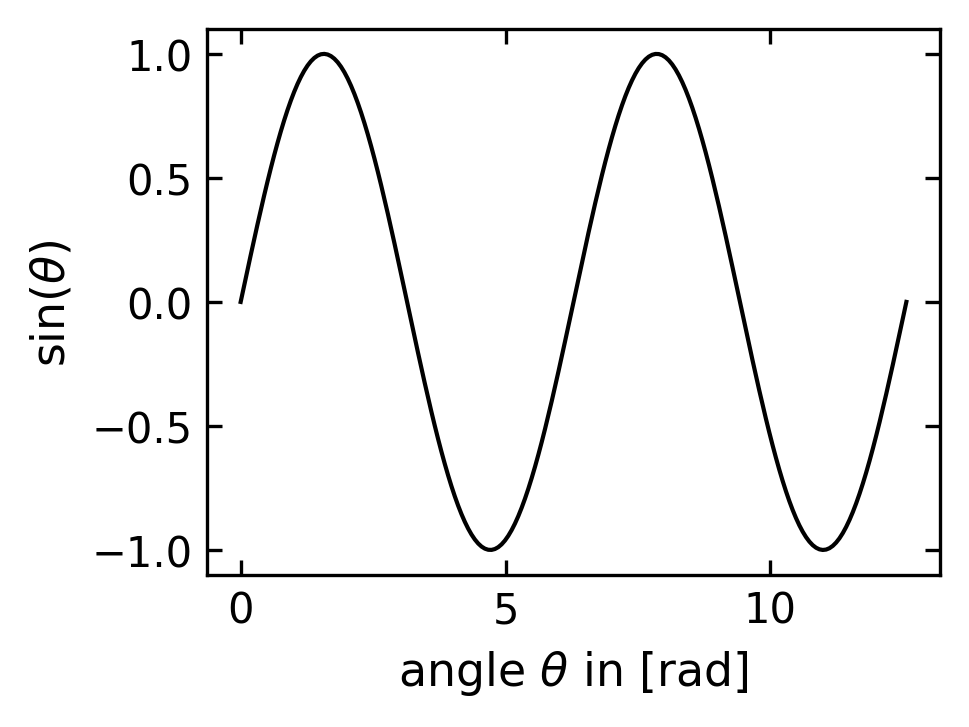

In [5]:
plt.figure(figsize=get_size(8,6),dpi=150)
x=np.linspace(0,np.pi*4,200)
plt.plot(x,np.sin(x),color='k')
plt.xlabel(r"angle $\theta$ in [rad]")
plt.ylabel(r"$\sin(\theta)$")
plt.savefig("figure_example1.pdf",bbox_inches = 'tight')
plt.show()

Wenn Sie dieses Bild in eine beliebige Software laden, erhalten Sie ein Bild mit einer Größe, die der eingestellten Breite entspricht.

![](img/bbox_size.png) 

## Erstellen eines Diagramms mit einer bestimmten Achsenrahmengröße




Der Achsenrahmen ist die Box des Rahmens, der die Achsen bereitstellt. Beim Erstellen einer Figur mit dem Befehl ```plt.figure()``` wird der Achsenrahmen von matplotlib so berechnet, dass er innerhalb der durch ```figsize``` angegebenen Boundingbox liegt, so dass alle Achsenbeschriftungen ebenfalls hineinpassen. Der Achsenrahmen ist daher kleiner als die angegebene Bounding Box und hängt oft von den Achsenbeschriftungen und weiteren Dingen ab. Wenn Sie einen Plot mit einer festen Größe des Achsenrahmens erstellen wollen, ist es sinnvoll, eine Funktion in Ihrem Code unterzubringen, die die Größe des Achsenrahmens festlegt. 
Diese Funktion könnte lauten

```
def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)
```

wobei Sie die gewünschte Breite und Höhe (in Zoll) der aktuellen Achse *ax* angeben müssen. Die Funktion gibt nichts zurück, sondern legt direkt die Größe fest.

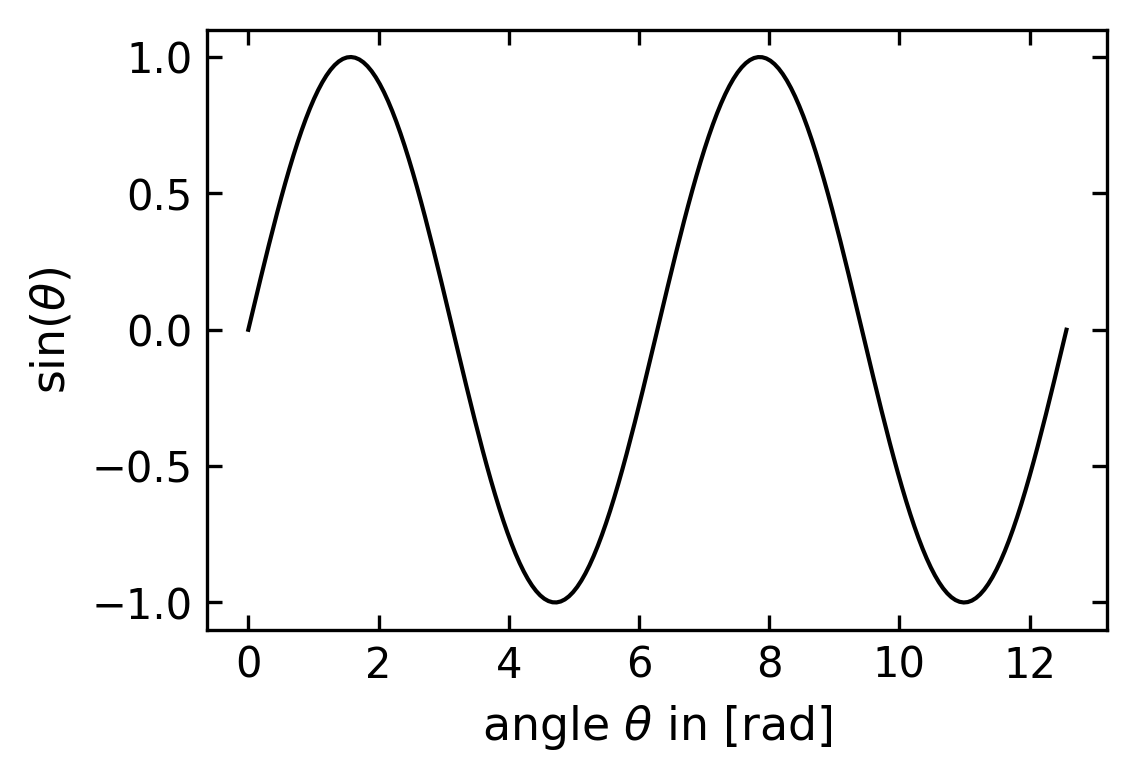

In [6]:
def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

fig=plt.figure(dpi=150)
ax=plt.axes()
ax.plot(x,np.sin(x),color='k')
ax.set_xlabel(r"angle $\theta$ in [rad]")
ax.set_ylabel(r"$\sin(\theta)$")
set_size(3,2)
plt.savefig("figure_example2.pdf",bbox_inches = 'tight')
plt.show()

Wenn Sie diese Abbildung in ein Grafikprogramm oder eine Textverarbeitungssoftware laden, sollte das Abbildungsfeld eine Größe von 7,62 cm mal 5,08 cm haben, ohne dass eine Neuskalierung erfolgt:

![](img/box_size.png) 

## Auswahl der Schriftarten

Matplotlib kann auf eine Reihe von verschiedenen Schriftarten zugreifen. Es kann schwierig sein, die passende Schriftart für den Formelstil Ihres Dokuments oder Ihrer Publikation zu finden. Eine Liste der Schriftarten, die Matplotlib zur Verfügung stehen, kann mit dem folgenden Codeschnipsel abgerufen werden, den ich [hier](https://jonathansoma.com/lede/data-studio/matplotlib/list-all-fonts-available-in-matplotlib-plus-samples/) gefunden habe.

In [7]:
def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

Falls Sie Ihr Dokument in *LaTeX* schreiben, könnten die **cmXXXX**-Schriften für Sie von Interesse sein, da sie den in *LaTeX*-Dokumenten verwendeten Schriften entsprechen. Hier ist ein Beispiel:

In [8]:
cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/cmr10.ttf')
plt.rcParams.update({'font.size': 12,
                     'axes.titlesize': 12,
                     'axes.labelsize': 12,
                     'axes.labelpad': 12,
                     'lines.linewidth': 1,
                     'lines.markersize': 10,
                     'xtick.labelsize' : 10,
                     'ytick.labelsize' : 10,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',
                     'font.family' : 'serif',
                     'font.serif' : cmfont.get_name(),
                     "axes.formatter.use_mathtext": True,
                     'text.usetex': True,
                     'mathtext.fontset' : 'cm'
                    })

In [9]:
x=np.linspace(0,np.pi,100)

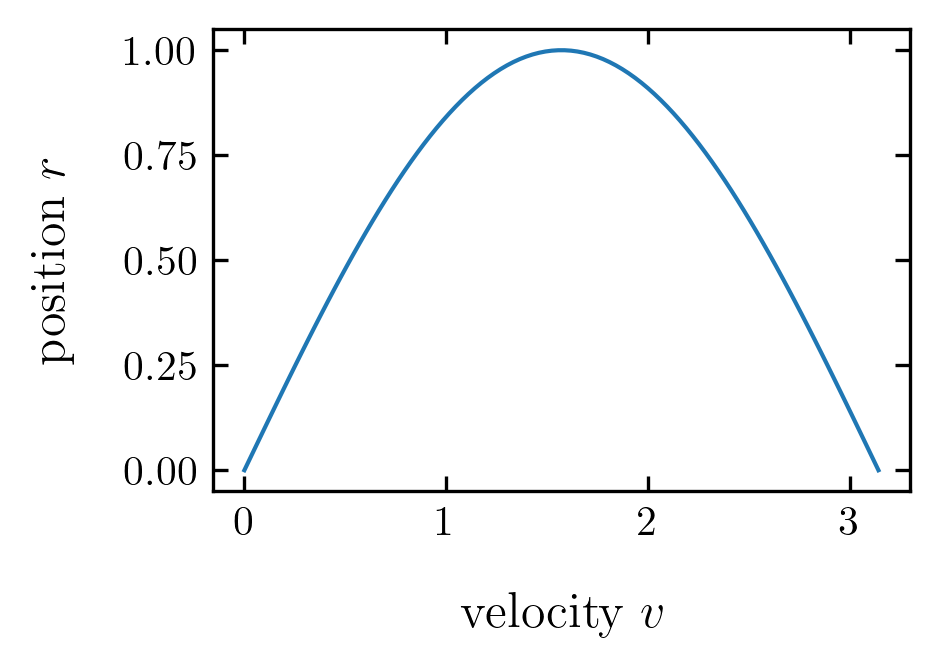

In [10]:
plt.figure(figsize=(3,2),dpi=150)
plt.plot(x,np.sin(x))
plt.xlabel(r"velocity $v$")
plt.ylabel(r"position $r$")
plt.show()

## Ein Dokument vorbereiten

Wenn man ein Dokument (Bachelorarbeit z.B.) erstellt, ist es nützlich, seine Daten und Texte geschickt zur organisieren, um sich Arbeit zu ersparen. Hier ist ein Beipiel, 

In [12]:
display_tree("Paper")

Paper/
├── Figures/
│   ├── Figure1/
│   │   └── Figure1.ipynb
│   ├── figure1.pdf
│   ├── Figure2/
│   │   └── Figure2.ipynb
│   └── figure2.pdf
└── Text/
    ├── content/
    │   ├── 01_introduction.tex
    │   ├── 02_theory.tex
    │   ├── 03_results.tex
    │   └── 04_conclusions.tex
    ├── main (Frank Cichos's conflicted copy 2023-11-16).fls
    ├── main.aux
    ├── main.bbl
    ├── main.blg
    ├── main.fdb_latexmk
    ├── main.fls
    ├── main.log
    ├── main.pdf
    ├── main.synctex.gz
    ├── main.tex
    └── mainNotes.bib
